In [65]:
import pandas as pd

artworks_df = pd.read_csv('artworks.csv')

# First few rows of the DataFrame
print(artworks_df.head())

          artist_name                                           painting  \
0  Akkitham Narayanan  https://d197irk3q85upd.cloudfront.net/catalog/...   
1  Akkitham Narayanan  https://d197irk3q85upd.cloudfront.net/catalog/...   
2  Akkitham Narayanan  https://d197irk3q85upd.cloudfront.net/catalog/...   
3  Akkitham Narayanan  https://d197irk3q85upd.cloudfront.net/catalog/...   
4  Akkitham Narayanan  https://d197irk3q85upd.cloudfront.net/catalog/...   

      title    year                medium  
0  Untitled  1968.0         Oil on canvas  
1  Untitled  1975.0  Mixed media on paper  
2  Untitled  1970.0  Mixed media on paper  
3  Untitled  1979.0  Mixed media on paper  
4  Untitled     NaN      Oil on oil paper  


In [64]:
# Basic information about the DataFrame
print(artworks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist_name  1207 non-null   object 
 1   painting     1207 non-null   object 
 2   title        1207 non-null   object 
 3   year         781 non-null    float64
 4   medium       1184 non-null   object 
dtypes: float64(1), object(4)
memory usage: 47.3+ KB
None


In [66]:
# Summary statistics for numerical columns
print(artworks_df.describe())

              year
count   781.000000
mean   1973.144686
std      31.540016
min    1786.000000
25%    1962.000000
50%    1978.000000
75%    1993.000000
max    2020.000000


In [70]:
# Calculate the count of artworks for each artist
artwork_counts = artworks_df['artist_name'].value_counts()

print(artwork_counts)

Nandalal Bose        9
Kalighat Pats        9
Laxman Pai           9
Sohan Qadri          9
Somnath Hore         9
                    ..
Bhupen Khakhar       2
Adi Davierwalla      1
Arpita Singh         1
Amrita Sher-Gil      1
Jehangir Sabavala    1
Name: artist_name, Length: 218, dtype: int64


In [90]:
artworks_by_year = artworks_df['year'].value_counts().sort_index()

# Find the year with the maximum number of artworks
max_year = artworks_by_year.idxmax()
max_artworks = artworks_by_year.max()

print(f"Year with the maximum number of artworks: {max_year} ({max_artworks} artworks)")


Year with the maximum number of artworks: 1995.0 (25 artworks)


In [168]:
# Filter the DataFrame to get artworks from the year with the maximum number of artworks
max_year_artworks = artworks_df[artworks_df['year'] == max_year]

# Get the details of the artworks created in the year with the maximum number of artworks
max_year_artworks_details = max_year_artworks[['artist_name', 'title', 'medium']]

print("Details of artworks created in the year with the maximum number of artworks:")
print(max_year_artworks_details.head())

Details of artworks created in the year with the maximum number of artworks:
        artist_name              title                         medium
339    G. R. Iranna       Village Mela                  Oil on canvas
1022    Sohan Qadri           Untitled  Ink and dye on handmade paper
1073  S. G. Vasudev         Earthscape                  Oil on canvas
1062   Somnath Hore  The Rogue Speared      Etching on handmade paper
524    Jai Zharotia           Untitled     Oil and charcoal on canvas


In [101]:
medium_counts = artworks_df['medium'].value_counts()

most_used_medium = medium_counts.idxmax()
most_used_medium_count = medium_counts.max()

print(f"The most commonly used medium in the artworks is '{most_used_medium}' with {most_used_medium_count} occurrences.")


The most commonly used medium in the artworks is 'Oil on canvas' with 117 occurrences.


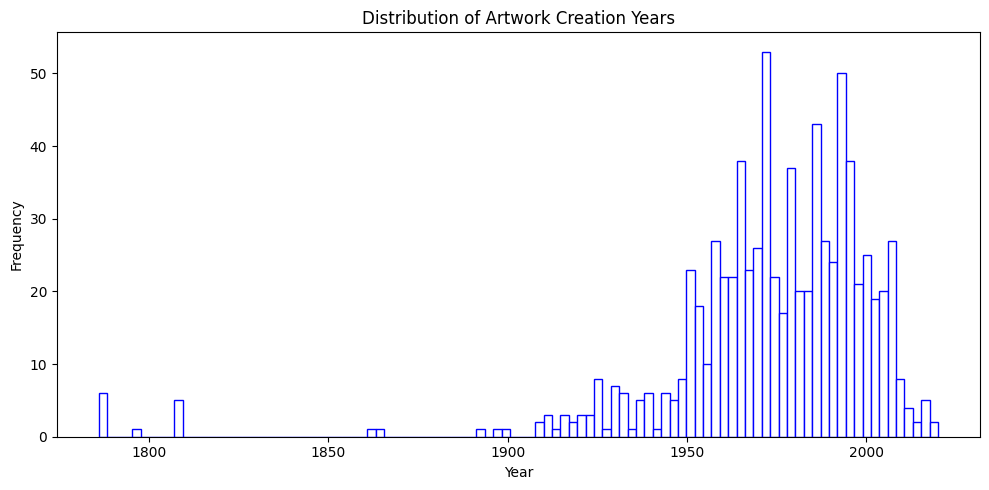

In [165]:
plt.figure(figsize=(10, 5))
plt.hist(artworks_df['year'].dropna(), bins=100, color='white', edgecolor='blue')
plt.title('Distribution of Artwork Creation Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

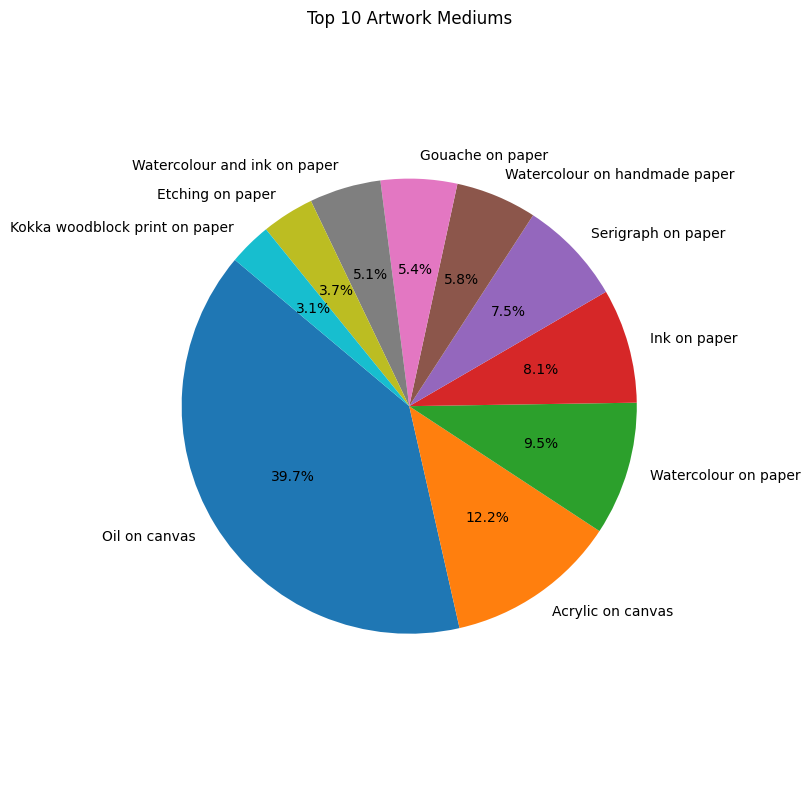

In [137]:
medium_counts = artworks_df['medium'].value_counts()
n = 10
top_mediums = medium_counts.head(n)

plt.figure(figsize=(8, 8))
plt.pie(top_mediums, labels=top_mediums.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {n} Artwork Mediums')
plt.axis('equal')
plt.tight_layout()
plt.show()


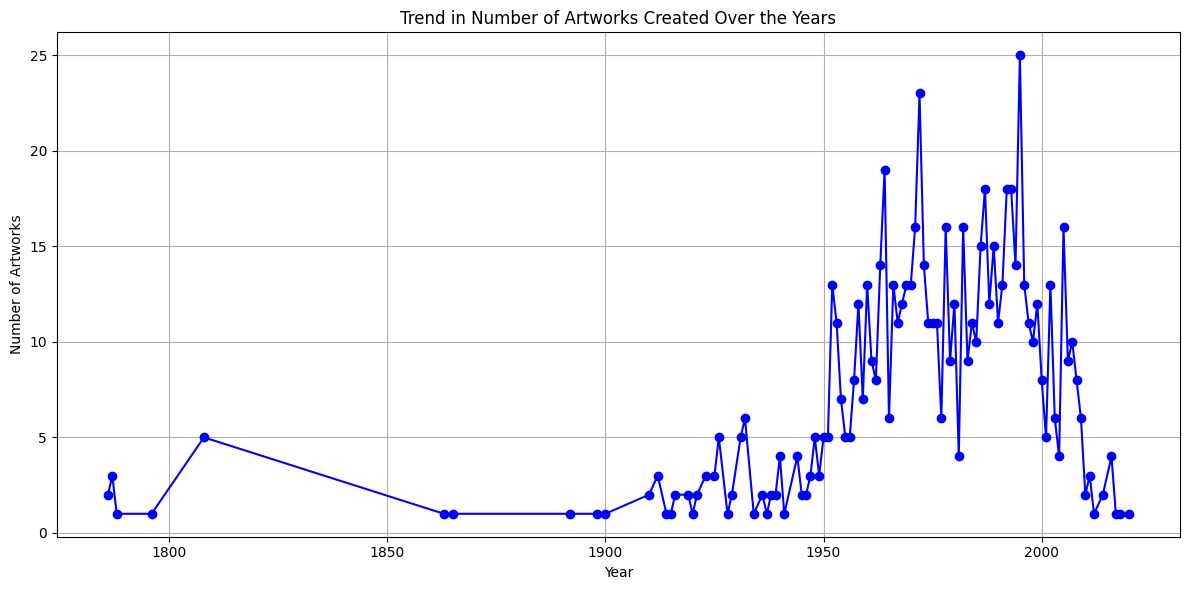

In [179]:
artworks_by_year = artworks_df.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(artworks_by_year.index, artworks_by_year.values, marker='o', color='b')
plt.title('Trend in Number of Artworks Created Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

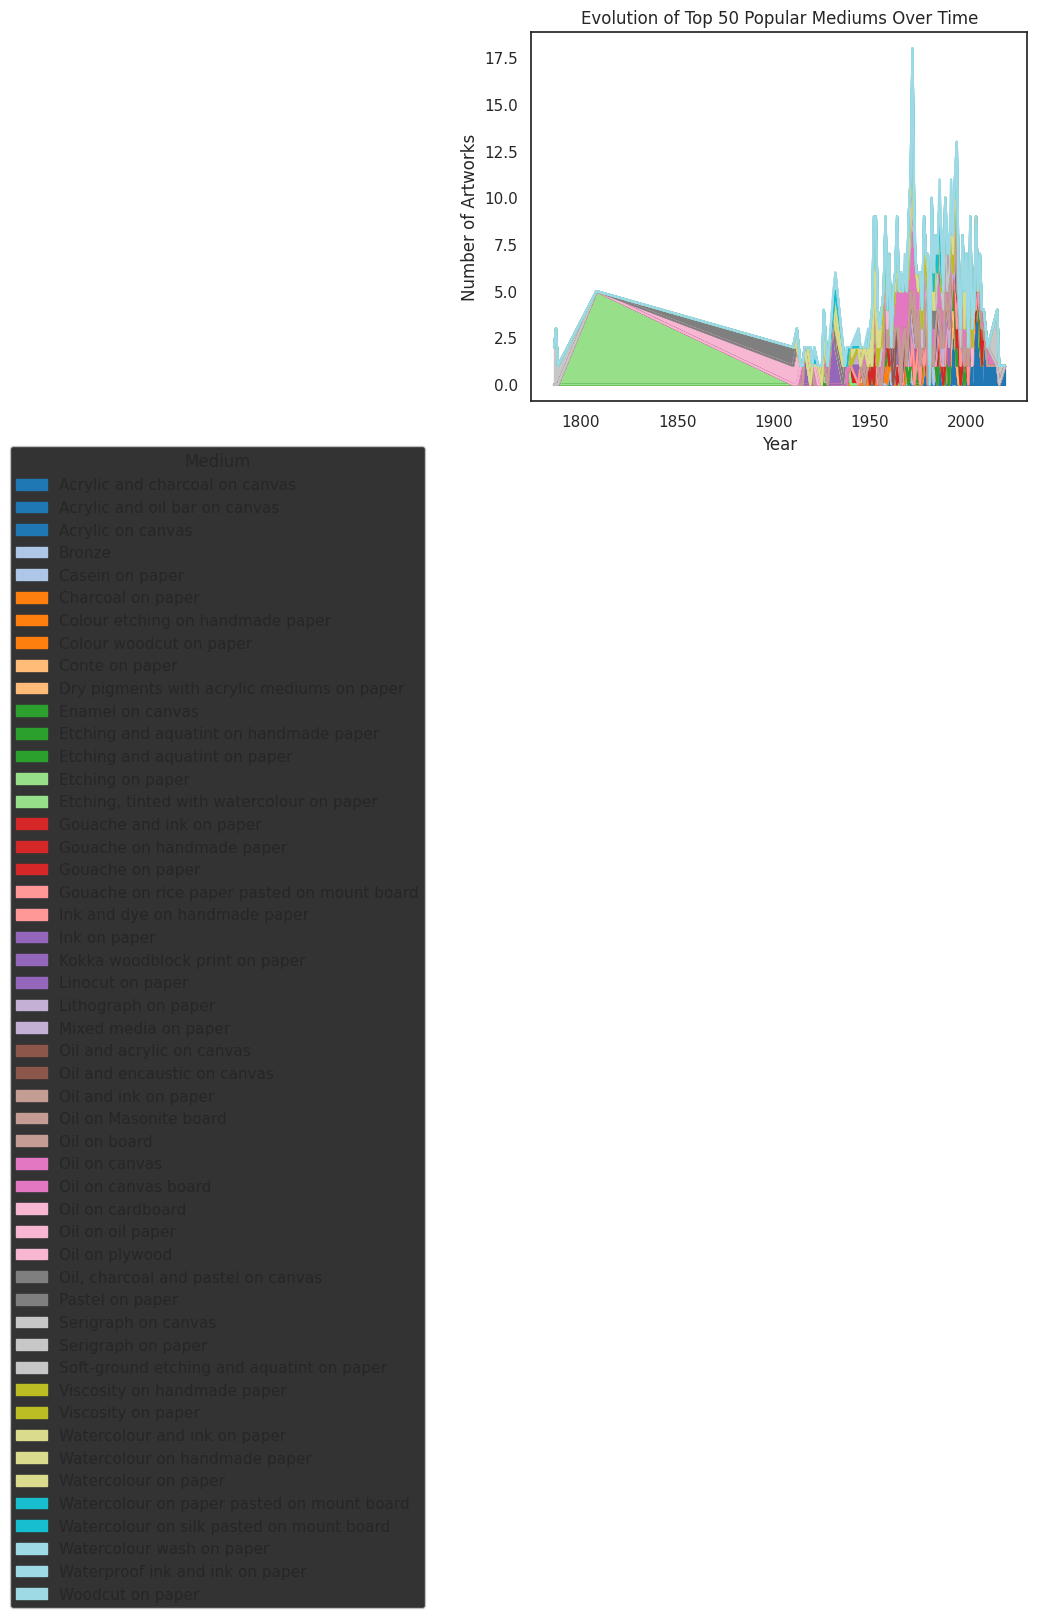

In [411]:
# Calculate the distribution of artwork mediums
medium_counts = artworks_df['medium'].value_counts()

# Select the top 20 mediums
top_mediums = medium_counts.head(50).index

# Filter the artwork data to include only the top 20 mediums
artworks_top50_mediums = artworks_df[artworks_df['medium'].isin(top_mediums)]

# Group the filtered artwork data by year and medium, and count the number of artworks for each combination
artworks_by_year_medium_top50 = artworks_top50_mediums.groupby(['year', 'medium']).size().unstack(fill_value=0)

# Plot the evolution of the top 50 popular mediums over time
plt.figure(figsize=(16, 10))  # Larger figure size
ax = artworks_by_year_medium_top50.plot(kind='area', stacked=True, colormap='tab20')
plt.title('Evolution of Top 50 Popular Mediums Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')


# Adjust the legend position and size
plt.legend(title='Medium', bbox_to_anchor=(-0.2, -0.1))  # Place legend outside the plot
plt.show()

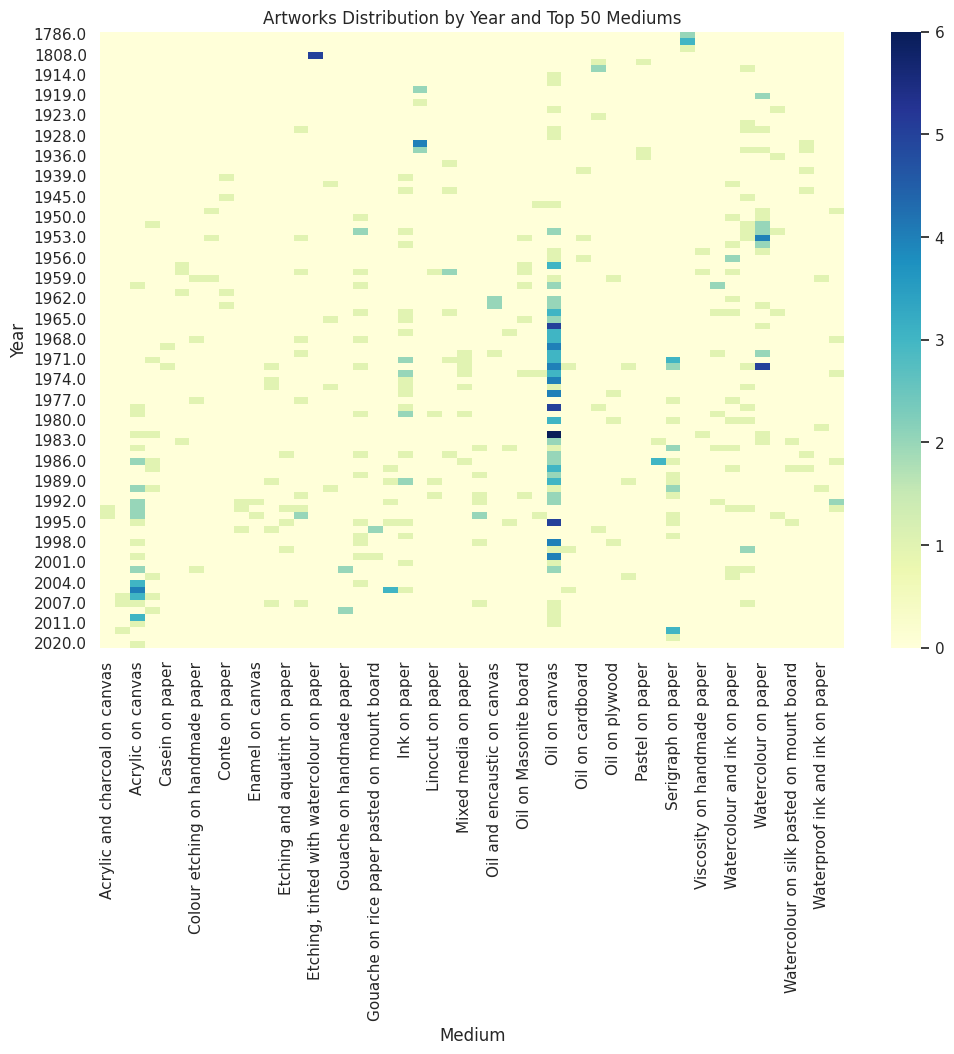

In [343]:
# Calculate the distribution of artwork mediums
medium_counts = artworks_df['medium'].value_counts()

n = 50

top_n_mediums = medium_counts.head(n).index

# Filter the artwork data to include only the top N mediums
artworks_topN_mediums = artworks_df[artworks_df['medium'].isin(top_n_mediums)]

# Group the filtered artwork data by year and medium, and count the number of artworks for each combination
artworks_by_year_medium_topN = artworks_topN_mediums.groupby(['year', 'medium']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(artworks_by_year_medium_topN, cmap='YlGnBu')
plt.title(f'Artworks Distribution by Year and Top {n} Mediums')
plt.xlabel('Medium')
plt.ylabel('Year')
plt.show()


In [362]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaModel

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

titles = artworks_df['title'].str.lower().str.replace('[^\w\s]', '', regex=True).apply(word_tokenize)
titles = [[lemmatizer.lemmatize(word) for word in title if word not in stop_words] for title in titles]

# Create a dictionary representation of the titles
dictionary = Dictionary(titles)

# Filter out words that occur less than 5 times and more than 50% of the titles
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(title) for title in titles]
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get the top words for each topic
topics = lda_model.print_topics(num_words=20)

print(topics)



[nltk_data] Downloading package punkt to /home/rishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rishi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rishi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[(0, '0.340*"head" + 0.292*"man" + 0.245*"village" + 0.010*"portrait" + 0.010*"view" + 0.010*"two" + 0.009*"series" + 0.009*"diptych" + 0.009*"woman" + 0.009*"ii" + 0.009*"composition" + 0.009*"iii" + 0.009*"life" + 0.009*"landscape" + 0.009*"figure" + 0.009*"still"'), (1, '0.436*"figure" + 0.366*"landscape" + 0.015*"head" + 0.014*"ii" + 0.014*"view" + 0.014*"iii" + 0.014*"diptych" + 0.014*"series" + 0.014*"woman" + 0.014*"portrait" + 0.014*"life" + 0.014*"man" + 0.014*"composition" + 0.014*"two" + 0.014*"village" + 0.014*"still"'), (2, '0.504*"woman" + 0.369*"ii" + 0.009*"composition" + 0.009*"life" + 0.009*"two" + 0.009*"series" + 0.009*"still" + 0.009*"portrait" + 0.009*"diptych" + 0.009*"view" + 0.009*"head" + 0.009*"man" + 0.009*"iii" + 0.009*"village" + 0.009*"figure" + 0.009*"landscape"'), (3, '0.404*"portrait" + 0.285*"composition" + 0.206*"two" + 0.009*"woman" + 0.009*"man" + 0.008*"view" + 0.008*"series" + 0.008*"village" + 0.008*"diptych" + 0.008*"ii" + 0.008*"iii" + 0.008*"

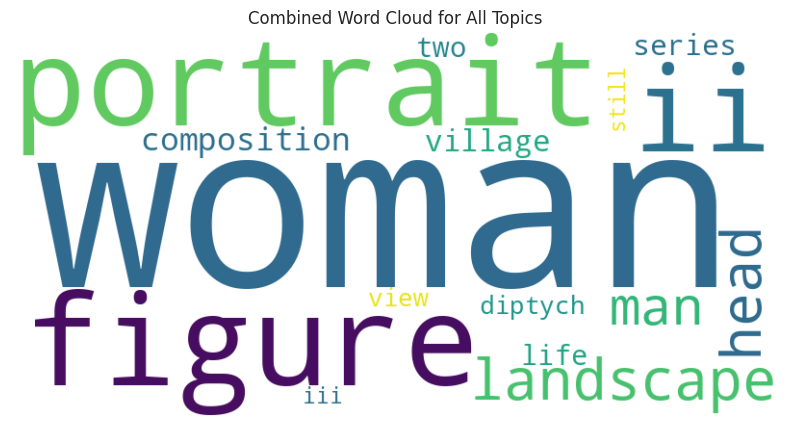

In [398]:
import re
from wordcloud import WordCloud

# Define a function to extract words and their weights from each topic string
def extract_words(topic_string):
    words = re.findall(r'\"(.*?)\"', topic_string)
    weights = re.findall(r'(\d+\.\d+)', topic_string)
    return words, weights

all_words = {}

# Extract words and weights from each topic and merge them into all_words dictionary
for topic in topics:
    words, weights = extract_words(topic[1])
    word_freq = dict(zip(words, map(float, weights)))
    for word, freq in word_freq.items():
        all_words[word] = all_words.get(word, 0) + freq

# Normalize word frequencies
max_freq = max(all_words.values())
all_words = {word: freq / max_freq for word, freq in all_words.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Combined Word Cloud for All Topics')
plt.axis('off')
plt.show()


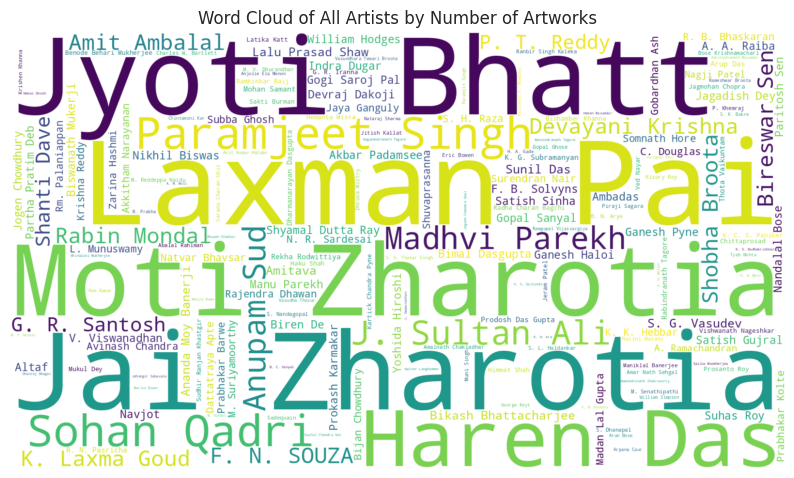

In [399]:
# Calculate the count of artworks for each artist
artwork_counts = artworks_df['artist_name'].value_counts()
top_artists = artwork_counts
wordcloud = WordCloud(width=1600, height=900, background_color='white').generate_from_frequencies(top_artists)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud of All Artists by Number of Artworks')
plt.axis('off')
plt.show()